In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import math
import os
import glob
import keras
import tensorflow as tf

from PIL import Image
from PIL import ImageDraw
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD



In [2]:
# Load the equation classifer model  
#model = tf.keras.models.load_model('./equationClassifier.h5')
#model = tf.keras.models.load_model('./equationClassifierAugmented.h5')
model = tf.keras.models.load_model('./XXXequationClassifier.h5')
model.summary()

2022-07-20 11:51:14.768150: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 4)         148       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 4)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 1)           37        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 1)          0

(2338, 1700)
<class 'numpy.ndarray'>
(256, 256, 1)


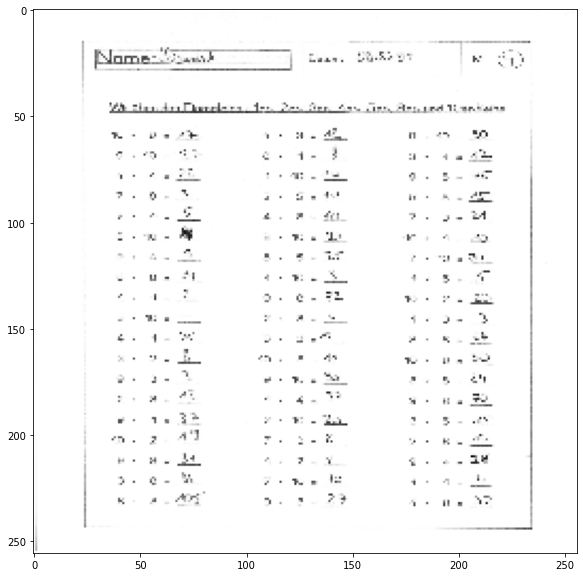

In [3]:
# Load the image on which mathematical equations should be detected
img = mpimg.imread('testImages/testImage2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Print image information and plot 
print(img.shape)
print(type(img))
scaleInputImage = cv2.resize(img, (256,256))
scaleInputImage = scaleInputImage.reshape((256,256,1))
print(scaleInputImage.shape)
plt.figure(figsize=(10,10))
plt.imshow(scaleInputImage, cmap='gray')


In [4]:
print(img.shape)

(2338, 1700)


In [5]:
# SLIDING WINDOW approach --> Crop single pieces of a picture and as for each single one whether there´s an equation or not
# --> With this approach one can not only ask whethr there´s an equation on the entire picture 
# but also where the equation is actually located on the picture


windowSize_x = 50
windowSize_y = 200
step_size_x = 50
step_size_y = 50

croppedImgList = []
foundEquationsList = []
whereAreEquations = []
# Iterate over picture 
for x in range(0, img.shape[0] - windowSize_x, step_size_x):
    for y in range (0, img.shape[1] - windowSize_y, step_size_y):
        croppedImg = img[x:x+windowSize_x, y:y+windowSize_y]
        resizedImg = cv2.resize(croppedImg, (64,64)).reshape(1,64,64,1)
        normalizedImg = resizedImg/255.0
        croppedImgList.append(normalizedImg)
        # Ask Neural Network
        prediction = model.predict(normalizedImg)
        if prediction[0][0] > 0.8: 
            whereAreEquations.append((x, y))
            foundEquationsList.append(normalizedImg)
            


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


49
(1, 64, 64, 1)
1/1 [==============================] - 0s 23ms/step
[[0.88395077 0.11604917]]


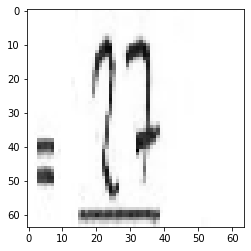

In [6]:
print(len(foundEquationsList))
sample = foundEquationsList[3]
samplePlot = sample.reshape(64,64,1)
print(sample.shape)
plt.imshow(samplePlot, cmap='gray')

#predict
predictSample = model.predict(sample)
print(predictSample)

In [7]:
#print(len(whereAreEquations))
#print(whereAreEquations)

imgDrawing = Image.open('testImages/testImage2.jpg')
#imgDrawing


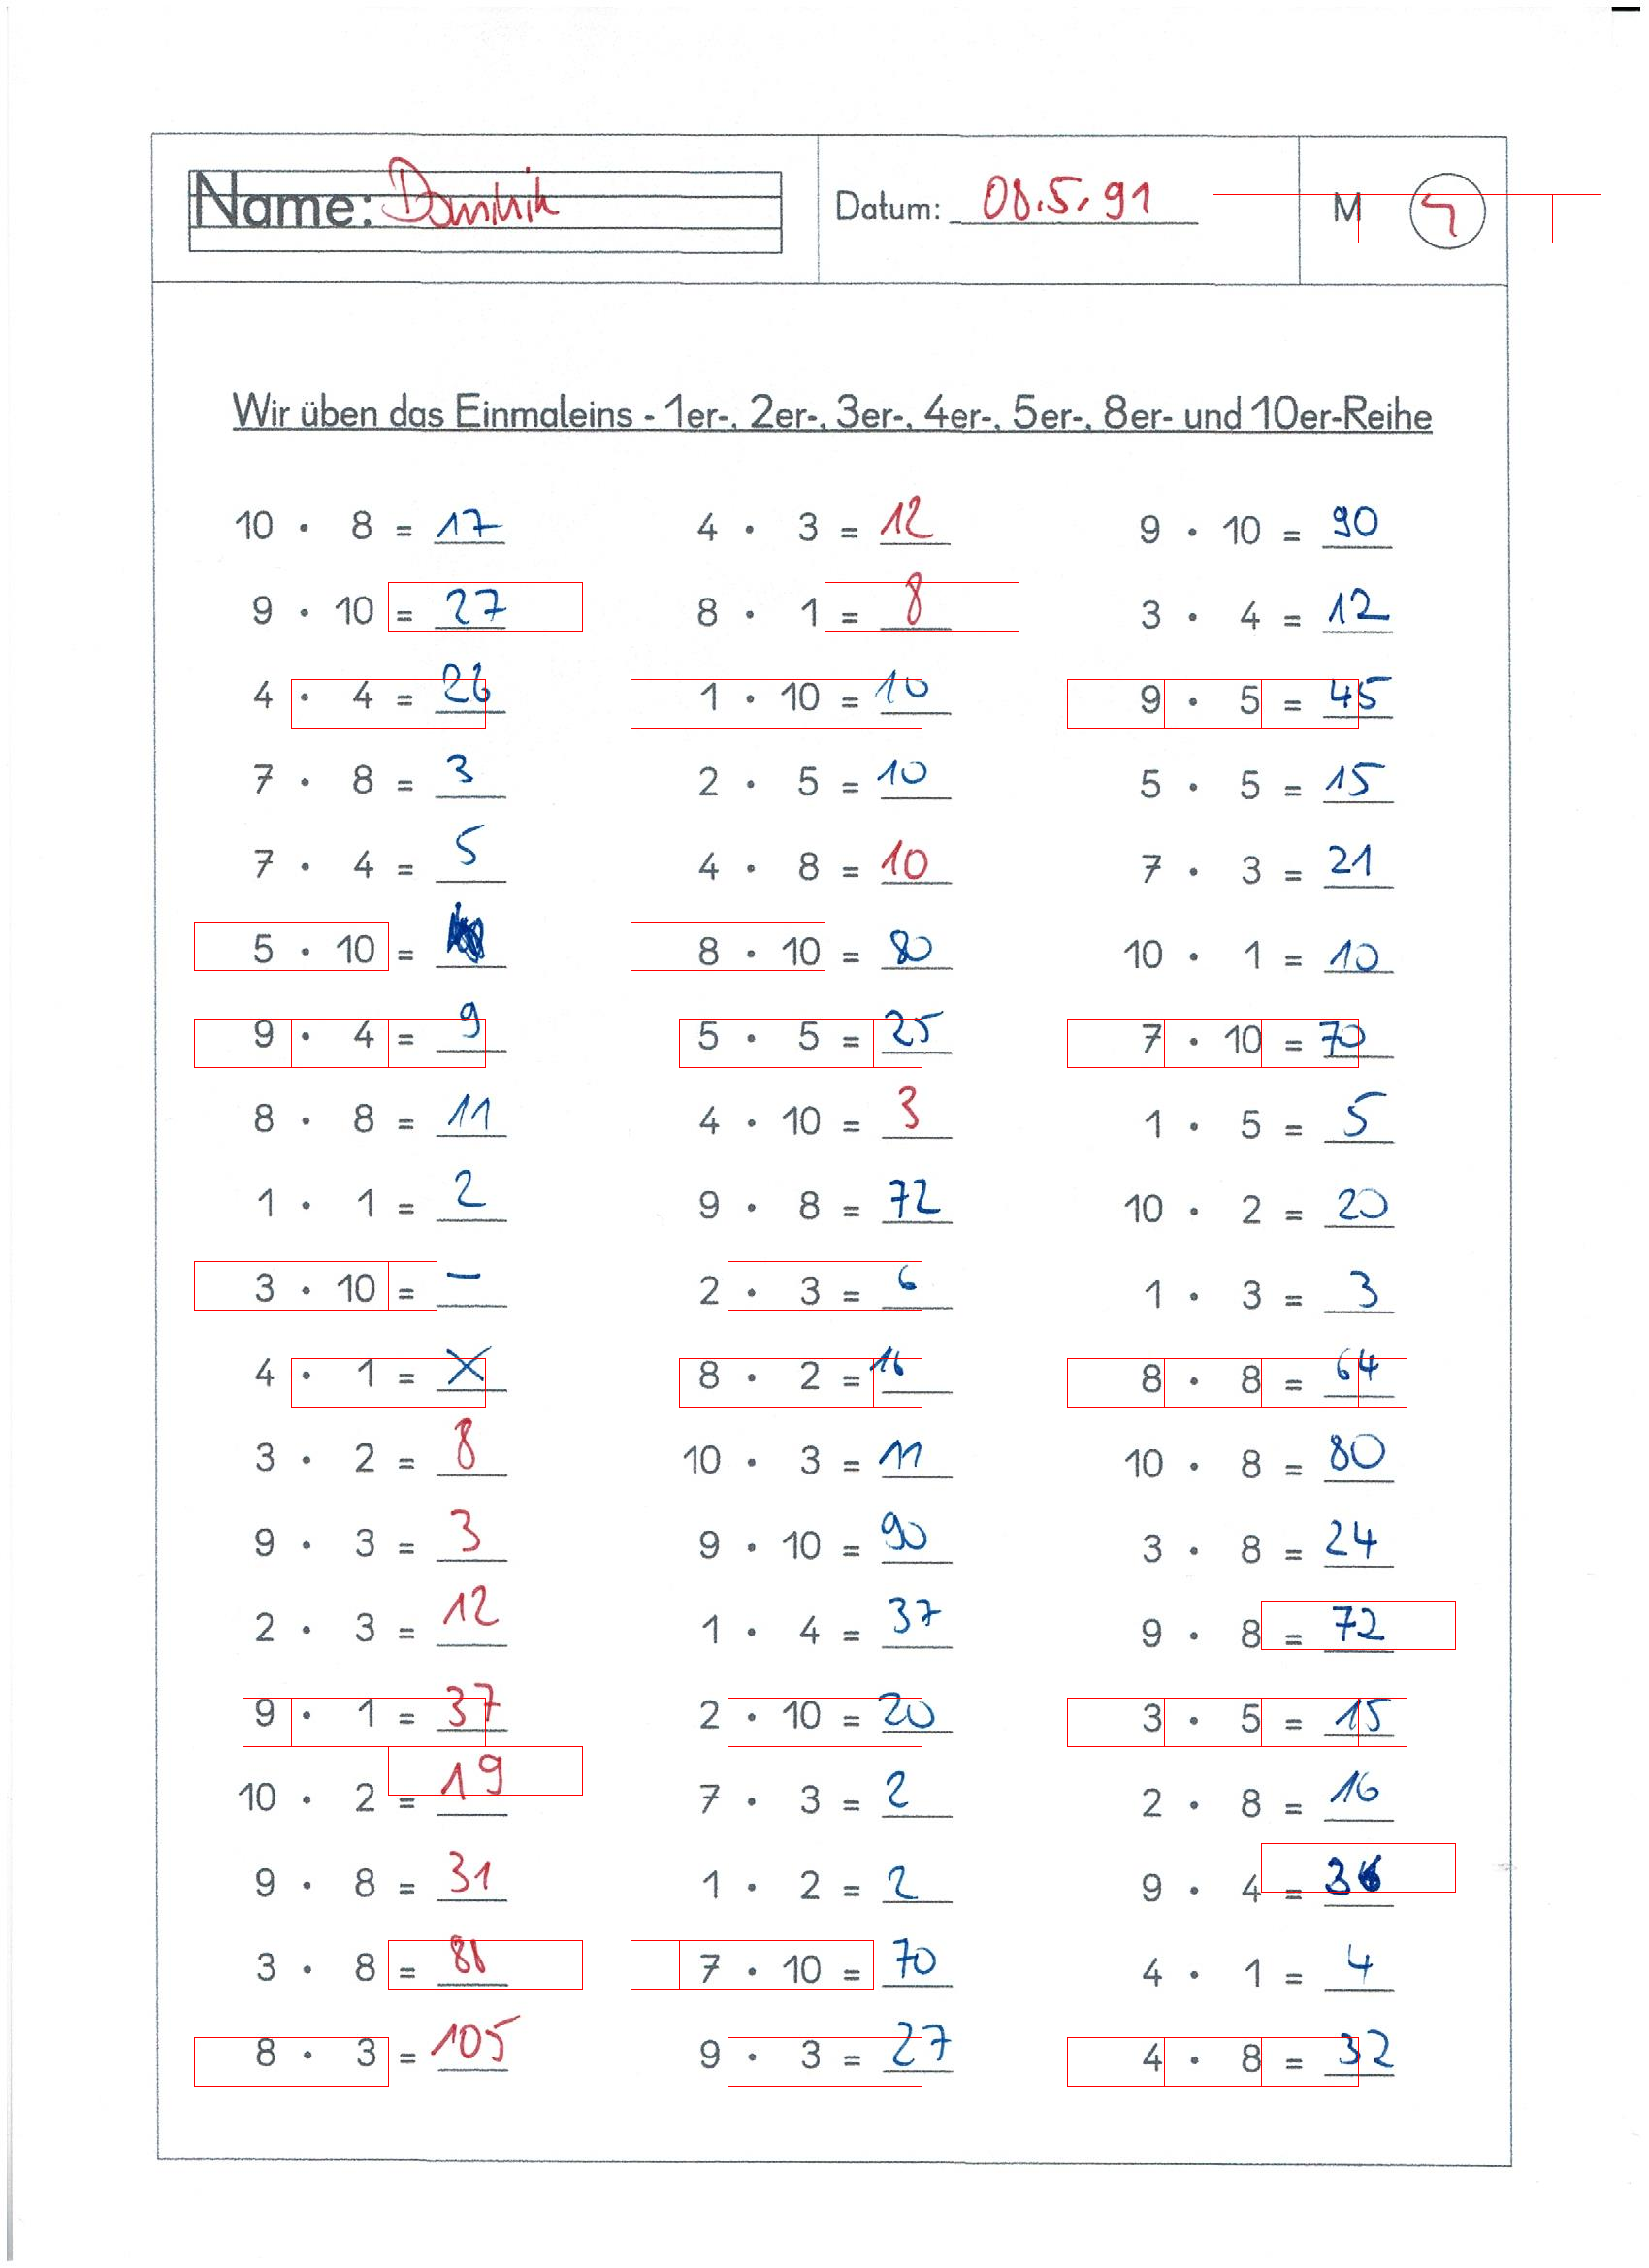

In [8]:
draw = ImageDraw.Draw(imgDrawing)

for equ in whereAreEquations:
    shape = [(equ[1], equ[0]), (equ[1] + windowSize_y, equ[0] + windowSize_x)]
    draw.rectangle(shape, outline='red')
    
imgDrawing

1380
1/1 [==============================] - 0s 23ms/step
[0.10969029 0.89030975]


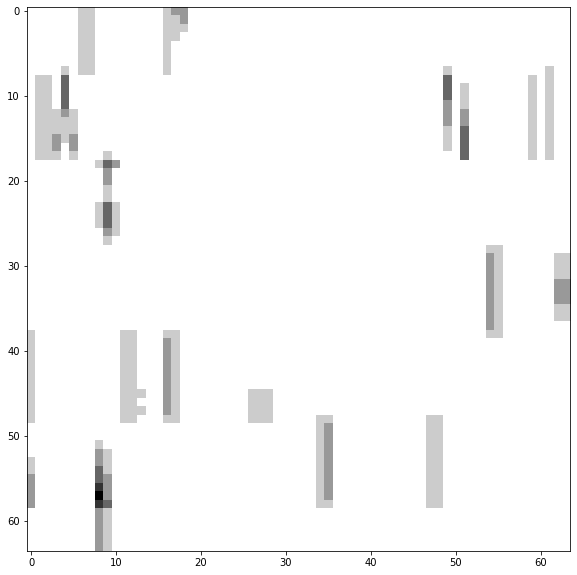

In [9]:
print(len(croppedImgList))
n = 45
sample = croppedImgList[n]
samplePlot = sample.reshape(64,64,1)
plt.figure(figsize=(10,10))
plt.imshow(samplePlot, cmap='gray')

# Would this crop be predicted as equation? 
prediction = model.predict(sample)
print(prediction[0])
